# Analysis of a given area data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

area='Piemonte'

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regional_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

area_data=regional_data[regional_data.denominazione_regione==area]
area_data=area_data.rename(columns = {'data': 'dates'},inplace = False)

relevant_columns=['dates','ricoverati_con_sintomi','terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati'];
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colorDict={'ricoverati_con_sintomi':'lightgray', 'terapia_intensiva':'darkgray',
           'totale_ospedalizzati':'dimgray', 'isolamento_domiciliare':'brown', 
           'totale_positivi':'red','variazione_totale_positivi':' orange', 
           'nuovi_positivi':'olive', 'dimessi_guariti':'gold','deceduti':'black',
           'casi_da_sospetto_diagnostico':'fuchsia', 'casi_da_screening':'violet',
           'totale_casi':'blue', 'tamponi':'green', 'casi_testati':'lime',
           'totale_positivi_corr':'red','totale_casi_corr':'blue'}
area_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

<br/>

# Definitions
**from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]**   
   
**ricoverati_con_sintomi <span style="color: red;">[stock in a given day]</span>**  
Ricoverati con sintomi | Hospitalised patients with symptoms  

**terapia_intensiva <span style="color: red;">[stock in a given day]</span>**  
Ricoverati in terapia intensiva	| Intensive Care  
  
**totale_ospedalizzati <span style="color: red;">[stock in a given day]</span>**  
Totale ospedalizzati | Total hospitalised patients  
  
**isolamento_domiciliare <span style="color: red;">[stock in a given day]</span>**  
Persone in isolamento domiciliare | Home confinement  
  
**totale_positivi <span style="color: red;">[stock in a given day]</span>**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) | Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi <span style="color: red;">[first difference of totale_positivi]</span>**  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi <span style="color: red;">[first difference of totale_casi]</span>**  
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) | News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti <span style="color: red;">[cumulative values]</span>**  
Persone dimesse guarite | Recovered  
  
**deceduti <span style="color: red;">[cumulative values]</span>**  
Persone decedute | Death  
  
**casi_da_sospetto_diagnostico <span style="color: red;">[cumulative values]</span>**  
Casi positivi al tampone emersi da attività clinica | Positive cases emerged from clinical activity  
  
**casi_da_screening <span style="color: red;">[cumulative values]</span>**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale | Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi <span style="color: red;">[cumulative values]</span>**  
Totale casi positivi | Total amount of positive cases  
  
**tamponi <span style="color: red;">[cumulative values]</span>**  
Totale tamponi - Tests performed  
  
**casi_testati <span style="color: red;">[cumulative values]</span>**  
Totale dei soggetti sottoposti al test | Total number of people tested  

**<span style="color: red;">Please look at the appendix for data examples and confrontations</span>**  

<br/>


# Data from the last two days  
<br/>



In [2]:
area_data[-3:][relevant_columns]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5389,2020-11-06,3871,268,4139,43777,47916,3942,4878,36993,4549,39162.0,50296.0,89458,1117280,703606.0
5410,2020-11-07,4122,284,4406,47083,51489,3573,4437,37812,4594,40806.0,53089.0,93895,1134670,715993.0
5431,2020-11-08,4367,304,4671,49526,54197,2708,3884,38953,4629,42321.0,55458.0,97779,1149489,726199.0


### First differences  

In [3]:
area_data[relevant_columns].diff()[-2:]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5410,1 days,251.0,16.0,267.0,3306.0,3573.0,-369.0,-441.0,819.0,45.0,1644.0,2793.0,4437.0,17390.0,12387.0
5431,1 days,245.0,20.0,265.0,2443.0,2708.0,-865.0,-553.0,1141.0,35.0,1515.0,2369.0,3884.0,14819.0,10206.0


<br/>

# Figure 1, using data as they are  
  
  
The introduction of 'casi_da_screening' profoundly modifies the 'totale_casi' count (a cumulative value) and – via 'isolamento_domiciliare' – also modifies the 'totale_positivi' count (a daily stock). Two reasons:   
  
(i) the overrepresentation of positive cases in the tested subjects is due to their characteristics (individuals with specific risk profiles);  
  
(ii) tracking cases via screening, we find asymptomatic positive persons who we were not accounting for in the first phase of the epidemic.

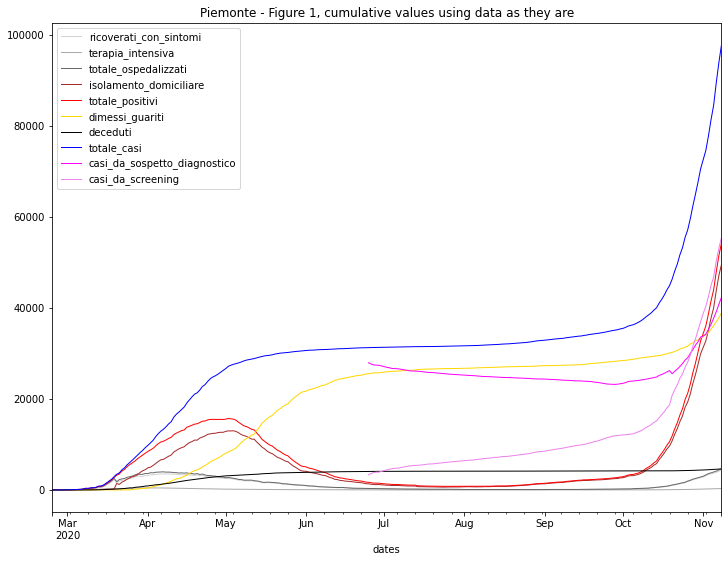

In [4]:
plt.rcParams['figure.figsize'] = [12, 9]
area_data.plot.line(x='dates',    y=['ricoverati_con_sintomi', 'terapia_intensiva',
                                     'totale_ospedalizzati','isolamento_domiciliare',
                                     'totale_positivi',
                                     'dimessi_guariti','deceduti',
                                     'totale_casi',
                                     'casi_da_sospetto_diagnostico','casi_da_screening'], 
                    title=area+" - Figure 1, cumulative values using data as they are",
                    color=colorDict,lw=1);

<br/>

## Figure 1.1  
  

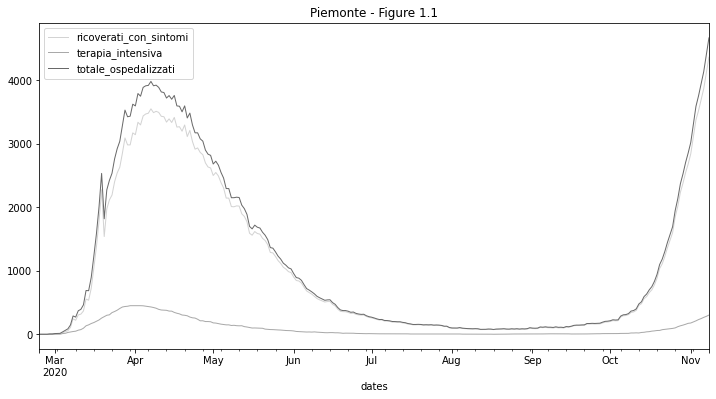

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
area_data.plot.line(x='dates',y=['ricoverati_con_sintomi',
                                    'terapia_intensiva','totale_ospedalizzati'], 
                            title=area+" - Figure 1.1",
                            color=colorDict,lw=1);

<br/>

# Figure 2

In [6]:
area_data['totale_casi_corr']=area_data['totale_casi'] - \
                                  area_data['casi_da_screening']

In [7]:
v=[np.nan]*14 # tows 0:13
for i in range(14,len(area_data['casi_da_screening'])):
    v.append(area_data[i:i+1]['casi_da_screening'].values[0] - \
             area_data[i-14:i-13]['casi_da_screening'].values[0] )

In [8]:
area_data['casi_da_screening_14']=v

In [9]:
area_data['totale_positivi_corr']=area_data['totale_positivi'] - \
                                  area_data['casi_da_screening_14']

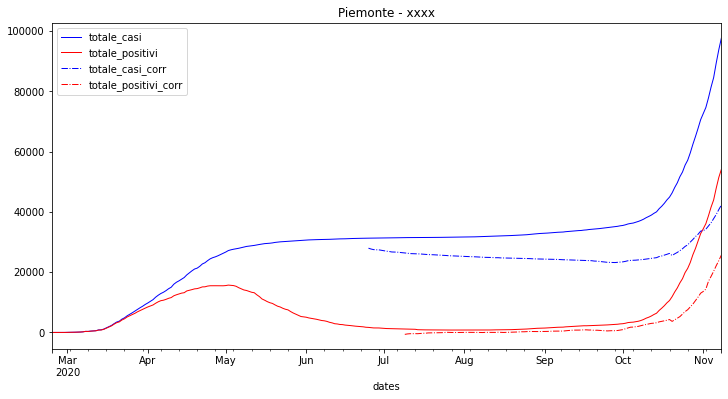

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
area_data.plot.line(x='dates',    y=['totale_casi','totale_positivi',
                                     'totale_casi_corr','totale_positivi_corr'],
                    title=area+" - xxxx",
                    color=colorDict, lw=1,style=["-","-","-.","-."]);

# Figure 3

<AxesSubplot:title={'center':'Figure 3'}, xlabel='dates'>

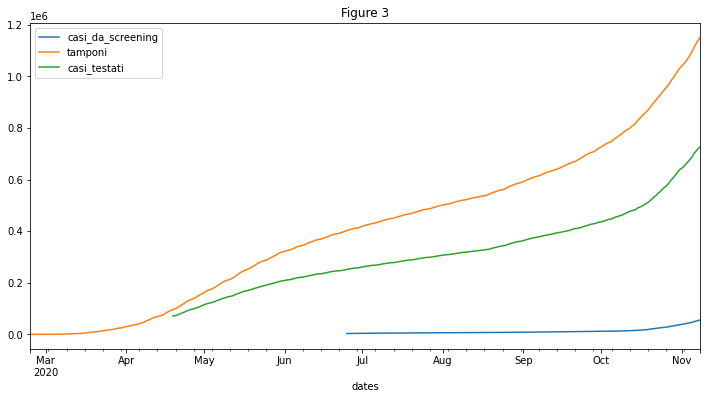

In [11]:
area_data.plot(x='dates',y=['casi_da_screening',
                                    'tamponi', 'casi_testati'], title="Figure 3")

# Ratios    
### casi_da_screening' / 'casi_testati' with a delay

In [12]:
area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe()

,casi_da_screening,tamponi,casi_testati
count,30.000000,3.000000e+01,30.000000
mean,28948.633333,9.467965e+05,574453.933333
std,12846.143601,1.113818e+05,81929.060760
min,13731.000000,7.865550e+05,467397.000000
25%,17426.000000,8.519152e+05,500140.000000
50%,26220.000000,9.378045e+05,561458.500000
75%,38388.000000,1.036746e+06,641948.750000
max,55458.000000,1.149489e+06,726199.000000


In [13]:
print(
"Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): %.2f%%" %
       (100 * area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][0] 
       /
              area_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][2]) )

Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): 5.04%


In [14]:
delay=5

In [15]:
print(area+" - Ratio 'casi_da_screening' %.10s / 'casi_testati' %.10s: %.2f%%" %
      (area_data[-1:][['dates']].values[0][0],
       area_data[-1-delay:-delay][['dates']].values[0][0],
       100*area_data[-1:][['casi_da_screening']].values[0][0] / \
    area_data[-1-delay:-delay][['casi_testati']].values[0][0]))

Piemonte - Ratio 'casi_da_screening' 2020-11-08 / 'casi_testati' 2020-11-03: 8.34%


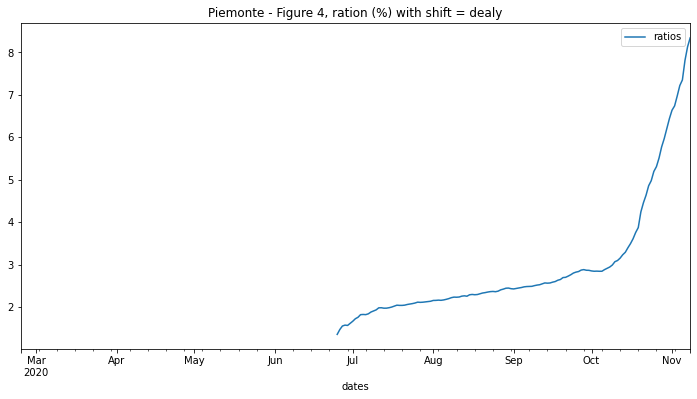

In [16]:
area_data['ratios']=100*area_data['casi_da_screening'] / \
    area_data['casi_testati'].shift(delay)
area_data.plot(x='dates',y=['ratios'], 
    title=area+" - Figure 4, ration (%) with shift = dealy");

<br/>

# Appendix: examples and confrontations
<br/>



In [17]:
# beginning of May
area_data[70:72][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
1483,2020-05-04,2391,161,2552,13010,15562,-76,192,8874,3186,NaN,NaN,27622,176078,123801.0
1504,2020-05-05,2307,155,2462,12861,15323,-239,152,9235,3216,NaN,NaN,27774,181316,126685.0


In [18]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
2391+161+13010

15562

In [19]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
15562+8874+3186

27622

In [20]:
# beginning of November
area_data[252:253][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']]

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5305,2020-11-02,3108,196,3304,32791,36095,1681,2003,34153,4415,34275.0,40388.0,74663,1050421,652762.0


In [21]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
3108+196+32791

36095

In [22]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
36095+34153+4415

74663

In [23]:
# and also
# verification 'totale_casi'='casi_da_sospetto_diagnostico'+'casi_da_screening'
34275+40388

74663